In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

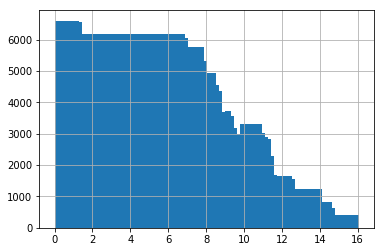

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
rawydf=ydf


In [23]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [24]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [25]:
def align_q(t):
    print 'align to ', t
    ydf=rawydf.copy()
    for qno in quakes:
        r=t/quake_duration[qno]
        print qno, r
        ydf.loc[qdf['index']==qno] *= r
    return ydf

align to  11
1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


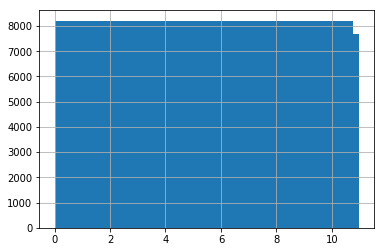

In [26]:
align_q(11).hist(bins=50);

In [27]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [28]:
str(config.quake_weights)

'{1: 1.25, 2: 0.666666666666667, 3: 0.25, 4: 1.25, 5: 0.25, 6: 0.25, 7: 0.666666666666667, 8: 0.25, 9: 0.25, 10: 1.25, 11: 1.25, 12: 0.25, 13: 0.25, 14: 0.666666666666667, 15: 0.25}'

In [29]:
str(config.target_lengths)

'[11.4252837645, 12.6407394841, 11.6683749084, 7.0496431738, 11.4252837645, 16.5301977869, 9.723645757, 12.6407394841, 16.5301977869]'

In [30]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [31]:
GNO=401
for u in range(len(config.target_lengths)):
    !mkdir -p input/sub/{GNO}/{u}

In [32]:
sub_path=os.path.join(config.INPUT_PATH, "sub", str(GNO))
sub_path

'/home/hadoop/lanlep2019/input/sub/401'

In [33]:
def make_sub(model, qno):
    fname =os.path.join(sub_path, str(targetno), "sub{}_q{}_at_s{}.csv".format(GNO,qno, randseed, targetno))
    print "write to " + fname    
    p = model.predict(testdf.values, num_iteration = model.best_iteration)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

                        
    

In [34]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    t=config.target_lengths[targetno]
    ydf=align_q(t)    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=Wtr,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[Wtr,None],
                    verbose=100, early_stopping_rounds=100)
    make_sub(model, qno)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [35]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'regression_l2',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "metric": 'mae',
          'seed': 1,
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [36]:
best_mae=1e10

In [37]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf, seed):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [38]:
best={'colsample_bytree': 0.7462366531860389,
 'learning_rate': 0.02203709896757661,
 'max_depth': 6.241579932057453,
 'min_data_in_leaf': 11.408663250331111,
 'min_sum_hessian_in_leaf': 0.020116578929822385,
 'num_leaves': 92.39862799020347,
 'reg_alpha': 0.14838935227908107,
 'reg_lambda': 3.196684038407483,
 'subsample': 0.8965789984593165}



In [40]:
import time


In [43]:
while True:
    if os.path.exists("/mnt/done400"):
        break
    else:
        time.sleep(60) 

In [44]:
scores={}
for targetno in range(0,len(config.target_lengths)):
    ascores=[]
    for _ in range(2):
        randseed=np.random.randint(low=1, high=11111111)
        best['seed']=randseed
        a=lgbcv(**best)
        ascores.append(a)
    scores[targetno]=ascores

valid quake 1
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(379874, 450) (379874,) (29520, 450) (29520,)


/home/hadoop/miniconda2/lib/python2.7/site-packages/lightgbm/sklearn.py:258: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please use `random_state` instead.', LGBMDeprecationWarning)


Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.06704	valid_1's l1: 1.35519
[200]	training's l1: 0.881686	valid_1's l1: 1.23388
[300]	training's l1: 0.81381	valid_1's l1: 1.22893
Early stopping, best iteration is:
[285]	training's l1: 0.822342	valid_1's l1: 1.2286
write to /home/hadoop/lanlep2019/input/sub/401/0/sub401_q1_at_s10330345.csv
quake  1 (1.2285951536622057, 285)
valid quake 2
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(373099, 450) (373099,) (36295, 450) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.07097	valid_1's l1: 1.45087
[200]	training's l1: 0.882091	valid_1's l1: 1.35078
[300]	training's l1: 0.811853	valid_1's l1: 1.34253
[400]	training's l1: 0.750234	vali

(386834, 450) (386834,) (22560, 450) (22560,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.0919	valid_1's l1: 1.07478
[200]	training's l1: 0.902074	valid_1's l1: 1.05179
Early stopping, best iteration is:
[151]	training's l1: 0.964995	valid_1's l1: 1.0458
write to /home/hadoop/lanlep2019/input/sub/401/0/sub401_q12_at_s10330345.csv
quake  12 (1.0458048870299397, 151)
valid quake 13
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.09	valid_1's l1: 1.21732
[200]	training's l1: 0.899245	valid_1's l1: 1.18807
Early stopping, best iteration is:
[174]	training's l1: 0.928812	valid_1's l1: 1.18626
write

(389202, 450) (389202,) (20192, 450) (20192,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08493	valid_1's l1: 1.48059
[200]	training's l1: 0.894414	valid_1's l1: 1.49418
Early stopping, best iteration is:
[114]	training's l1: 1.03731	valid_1's l1: 1.47742
write to /home/hadoop/lanlep2019/input/sub/401/0/sub401_q8_at_s5174339.csv
quake  8 (1.4774157297568191, 114)
valid quake 9
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(384759, 450) (384759,) (24635, 450) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.09686	valid_1's l1: 1.03252
[200]	training's l1: 0.904657	valid_1's l1: 0.983665
Early stopping, best iteration is:
[196]	training's l1: 0.908804	valid_1's l1: 0.983349
wri

[200]	training's l1: 0.996914	valid_1's l1: 1.3037
[300]	training's l1: 0.914404	valid_1's l1: 1.29374
Early stopping, best iteration is:
[297]	training's l1: 0.917193	valid_1's l1: 1.29282
write to /home/hadoop/lanlep2019/input/sub/401/1/sub401_q4_at_s575620.csv
quake  4 (1.2928210021288689, 297)
valid quake 5
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(388820, 450) (388820,) (20574, 450) (20574,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.20183	valid_1's l1: 1.64925
[200]	training's l1: 0.993369	valid_1's l1: 1.65047
Early stopping, best iteration is:
[135]	training's l1: 1.09169	valid_1's l1: 1.63492
write to /home/hadoop/lanlep2019/input/sub/401/1/sub401_q5_at_s575620.csv
quake  5 (1.6349181566640336, 135)
valid qu

[200]	training's l1: 0.996313	valid_1's l1: 1.32206
Early stopping, best iteration is:
[127]	training's l1: 1.11564	valid_1's l1: 1.29917
write to /home/hadoop/lanlep2019/input/sub/401/1/sub401_q15_at_s575620.csv
quake  15 (1.2991676561111727, 127)
mean score 1.3525704768250433
valid quake 1
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(379874, 450) (379874,) (29520, 450) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.18217	valid_1's l1: 1.50957
[200]	training's l1: 0.97713	valid_1's l1: 1.37593
[300]	training's l1: 0.900323	valid_1's l1: 1.37224
[400]	training's l1: 0.838904	valid_1's l1: 1.3753
Early stopping, best iteration is:
[314]	training's l1: 0.890799	valid_1's l1: 1.37147
write to /home/hadoop/lanlep2019/i

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.23036	valid_1's l1: 1.23286
[200]	training's l1: 1.01351	valid_1's l1: 1.15528
[300]	training's l1: 0.935036	valid_1's l1: 1.15619
Early stopping, best iteration is:
[257]	training's l1: 0.965901	valid_1's l1: 1.15275
write to /home/hadoop/lanlep2019/input/sub/401/1/sub401_q11_at_s7196335.csv
quake  11 (1.1527481371362045, 257)
valid quake 12
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(386834, 450) (386834,) (22560, 450) (22560,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.21144	valid_1's l1: 1.19382
[200]	training's l1: 0.999264	valid_1's l1: 1.17133
Early stopping, best iteration is:
[161]	training's l1: 1.05267	valid_1's l1: 1.16348

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08441	valid_1's l1: 1.5146
[200]	training's l1: 0.88552	valid_1's l1: 1.43112
[300]	training's l1: 0.811139	valid_1's l1: 1.42274
[400]	training's l1: 0.75386	valid_1's l1: 1.42333
Early stopping, best iteration is:
[324]	training's l1: 0.795028	valid_1's l1: 1.42106
write to /home/hadoop/lanlep2019/input/sub/401/2/sub401_q7_at_s6905567.csv
quake  7 (1.421060678884532, 324)
valid quake 8
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(389202, 450) (389202,) (20192, 450) (20192,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.10737	valid_1's l1: 1.51217
[200]	training's l1: 0.914079	valid_1's l1: 1.5238
Early stopping, best iteration is:
[10

(386763, 450) (386763,) (22631, 450) (22631,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.11886	valid_1's l1: 0.937117
[200]	training's l1: 0.923812	valid_1's l1: 0.945616
Early stopping, best iteration is:
[119]	training's l1: 1.05487	valid_1's l1: 0.925563
write to /home/hadoop/lanlep2019/input/sub/401/2/sub401_q3_at_s1823450.csv
quake  3 (0.9255634982025407, 119)
valid quake 4
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(376914, 450) (376914,) (32480, 450) (32480,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.12294	valid_1's l1: 1.27179
[200]	training's l1: 0.922193	valid_1's l1: 1.2
[300]	training's l1: 0.845009	valid_1's l1: 1.1945
Early stopping, best iteration is:
[296]	t

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.0846	valid_1's l1: 1.55309
[200]	training's l1: 0.88923	valid_1's l1: 1.47499
[300]	training's l1: 0.81518	valid_1's l1: 1.47127
Early stopping, best iteration is:
[256]	training's l1: 0.843593	valid_1's l1: 1.46836
write to /home/hadoop/lanlep2019/input/sub/401/2/sub401_q14_at_s1823450.csv
quake  14 (1.468359021861567, 256)
valid quake 15
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(385215, 450) (385215,) (24179, 450) (24179,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.11402	valid_1's l1: 1.2029
[200]	training's l1: 0.919592	valid_1's l1: 1.2096
Early stopping, best iteration is:
[118]	training's l1: 1.05449	valid_1's l1: 1.19433
wr

8 0.891666391336
9 0.731505067123
10 0.616943468607
11 0.639449242705
12 0.798502388232
13 0.822999981795
14 0.477892025335
15 0.745244957989
(380166, 450) (380166,) (29228, 450) (29228,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.680842	valid_1's l1: 0.698244
[200]	training's l1: 0.5601	valid_1's l1: 0.648794
[300]	training's l1: 0.516422	valid_1's l1: 0.64425
[400]	training's l1: 0.481856	valid_1's l1: 0.644147
Early stopping, best iteration is:
[357]	training's l1: 0.496298	valid_1's l1: 0.643326
write to /home/hadoop/lanlep2019/input/sub/401/3/sub401_q10_at_s7991912.csv
quake  10 (0.6433262919852887, 357)
valid quake 11
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 0.998639467507
7 0.437675733544
8 0.891666391336
9 0.731505067123
10 0.616943468607
11 0.639449242705
12 0.798502388232
13 0.822999981795
14 0.477892025335
15 0.745244957989
(381198, 450) (381198,) (28196, 450) (2819

[200]	training's l1: 0.552546	valid_1's l1: 0.920945
Early stopping, best iteration is:
[127]	training's l1: 0.618287	valid_1's l1: 0.914427
write to /home/hadoop/lanlep2019/input/sub/401/3/sub401_q5_at_s1268576.csv
quake  5 (0.9144270664396303, 127)
valid quake 6
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 0.998639467507
7 0.437675733544
8 0.891666391336
9 0.731505067123
10 0.616943468607
11 0.639449242705
12 0.798502388232
13 0.822999981795
14 0.477892025335
15 0.745244957989
(391376, 450) (391376,) (18018, 450) (18018,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.670609	valid_1's l1: 0.91026
[200]	training's l1: 0.555339	valid_1's l1: 0.885558
[300]	training's l1: 0.510916	valid_1's l1: 0.882248
[400]	training's l1: 0.47313	valid_1's l1: 0.880014
[500]	training's l1: 0.442124	valid_1's l1: 0.879999
Early stopping, best iteration is:
[423]	training's l1: 0.466423	valid_1's l1: 0

[200]	training's l1: 0.556066	valid_1's l1: 0.744441
Early stopping, best iteration is:
[119]	training's l1: 0.634836	valid_1's l1: 0.732198
write to /home/hadoop/lanlep2019/input/sub/401/3/sub401_q15_at_s1268576.csv
quake  15 (0.7321979139092407, 119)
mean score 0.7530388555564879
valid quake 1
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(379874, 450) (379874,) (29520, 450) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.0686	valid_1's l1: 1.35701
[200]	training's l1: 0.884212	valid_1's l1: 1.23847
[300]	training's l1: 0.812829	valid_1's l1: 1.2341
Early stopping, best iteration is:
[251]	training's l1: 0.843545	valid_1's l1: 1.2326
write to /home/hadoop/lanlep2019/input/sub/401/4/sub401_q1_at_s9967472.csv
quake 

8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(381198, 450) (381198,) (28196, 450) (28196,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.11014	valid_1's l1: 1.11157
[200]	training's l1: 0.914641	valid_1's l1: 1.04602
[300]	training's l1: 0.842263	valid_1's l1: 1.04838
Early stopping, best iteration is:
[217]	training's l1: 0.899661	valid_1's l1: 1.04588
write to /home/hadoop/lanlep2019/input/sub/401/4/sub401_q11_at_s9967472.csv
quake  11 (1.0458775582606386, 217)
valid quake 12
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(386834, 450) (386834,) (22560, 450) (22560,)
Training until validation scores don't improve for 100 rounds.
[100]

(368154, 450) (368154,) (41240, 450) (41240,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.06033	valid_1's l1: 1.48727
[200]	training's l1: 0.865514	valid_1's l1: 1.39749
[300]	training's l1: 0.79519	valid_1's l1: 1.39017
Early stopping, best iteration is:
[294]	training's l1: 0.798921	valid_1's l1: 1.38996
write to /home/hadoop/lanlep2019/input/sub/401/4/sub401_q7_at_s462308.csv
quake  7 (1.3899620200212126, 294)
valid quake 8
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(389202, 450) (389202,) (20192, 450) (20192,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08335	valid_1's l1: 1.47726
[200]	training's l1: 0.89616	valid_1's l1: 1.49236
Early stopping, best iteration is:
[108]	t

(386763, 450) (386763,) (22631, 450) (22631,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.5838	valid_1's l1: 1.32348
[200]	training's l1: 1.31003	valid_1's l1: 1.32915
Early stopping, best iteration is:
[121]	training's l1: 1.48665	valid_1's l1: 1.30366
write to /home/hadoop/lanlep2019/input/sub/401/5/sub401_q3_at_s6176273.csv
quake  3 (1.3036634175724005, 121)
valid quake 4
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(376914, 450) (376914,) (32480, 450) (32480,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.58664	valid_1's l1: 1.8119
[200]	training's l1: 1.30473	valid_1's l1: 1.70715
[300]	training's l1: 1.1999	valid_1's l1: 1.6975
[400]	training's l1: 1.11088	valid_1's l1: 1.6951
[

[1300]	training's l1: 0.685892	valid_1's l1: 1.68118
[1400]	training's l1: 0.65609	valid_1's l1: 1.67992
[1500]	training's l1: 0.62944	valid_1's l1: 1.67699
[1600]	training's l1: 0.604989	valid_1's l1: 1.67703
[1700]	training's l1: 0.581304	valid_1's l1: 1.67591
[1800]	training's l1: 0.56092	valid_1's l1: 1.67531
[1900]	training's l1: 0.541116	valid_1's l1: 1.67517
Early stopping, best iteration is:
[1845]	training's l1: 0.551183	valid_1's l1: 1.67444
write to /home/hadoop/lanlep2019/input/sub/401/5/sub401_q13_at_s6176273.csv
quake  13 (1.6744443964073694, 1845)
valid quake 14
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.53335	valid_1'

13 1.92979306077
14 1.12057440424
15 1.74747093598
(384759, 450) (384759,) (24635, 450) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.58554	valid_1's l1: 1.49516
[200]	training's l1: 1.31044	valid_1's l1: 1.42701
[300]	training's l1: 1.20393	valid_1's l1: 1.42315
[400]	training's l1: 1.11684	valid_1's l1: 1.42135
[500]	training's l1: 1.04778	valid_1's l1: 1.42005
Early stopping, best iteration is:
[485]	training's l1: 1.05698	valid_1's l1: 1.41866
write to /home/hadoop/lanlep2019/input/sub/401/5/sub401_q9_at_s9821320.csv
quake  9 (1.418657619502298, 485)
valid quake 10
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(380166, 450) (380166,) (29228, 450) (29228,)
Training until validation scores don't improve for 100 roun

(388820, 450) (388820,) (20574, 450) (20574,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.922762	valid_1's l1: 1.2629
[200]	training's l1: 0.764224	valid_1's l1: 1.26186
Early stopping, best iteration is:
[143]	training's l1: 0.82669	valid_1's l1: 1.2519
write to /home/hadoop/lanlep2019/input/sub/401/6/sub401_q5_at_s5962320.csv
quake  5 (1.2518978451341425, 143)
valid quake 6
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998955458
12 1.10138260446
13 1.13517238869
14 0.659161414257
15 1.02792407999
(391376, 450) (391376,) (18018, 450) (18018,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.92763	valid_1's l1: 1.26013
[200]	training's l1: 0.769239	valid_1's l1: 1.22391
[300]	training's l1: 0.709253	valid_1's l1: 1.22388
Early stopping, best iteration is:
[279]

(379874, 450) (379874,) (29520, 450) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.90956	valid_1's l1: 1.15157
[200]	training's l1: 0.752037	valid_1's l1: 1.04846
[300]	training's l1: 0.692743	valid_1's l1: 1.04457
Early stopping, best iteration is:
[293]	training's l1: 0.69586	valid_1's l1: 1.04408
write to /home/hadoop/lanlep2019/input/sub/401/6/sub401_q1_at_s278453.csv
quake  1 (1.0440776128558478, 293)
valid quake 2
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998955458
12 1.10138260446
13 1.13517238869
14 0.659161414257
15 1.02792407999
(373099, 450) (373099,) (36295, 450) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.910606	valid_1's l1: 1.24022
[200]	training's l1: 0.75067	valid_1's l1: 1.14417
[300]	training's l1: 0.688316	valid_1's 

(386834, 450) (386834,) (22560, 450) (22560,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.930274	valid_1's l1: 0.914732
[200]	training's l1: 0.76954	valid_1's l1: 0.896179
Early stopping, best iteration is:
[144]	training's l1: 0.831385	valid_1's l1: 0.892262
write to /home/hadoop/lanlep2019/input/sub/401/6/sub401_q12_at_s278453.csv
quake  12 (0.8922615928734366, 144)
valid quake 13
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998955458
12 1.10138260446
13 1.13517238869
14 0.659161414257
15 1.02792407999
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.928806	valid_1's l1: 1.03804
[200]	training's l1: 0.767519	valid_1's l1: 1.01116
[300]	training's l1: 0.707357	valid_1's l1: 1.01043
Early stopping, best iteration i

(389202, 450) (389202,) (20192, 450) (20192,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.19955	valid_1's l1: 1.63567
[200]	training's l1: 0.989024	valid_1's l1: 1.65715
Early stopping, best iteration is:
[106]	training's l1: 1.17485	valid_1's l1: 1.6325
write to /home/hadoop/lanlep2019/input/sub/401/7/sub401_q8_at_s2109682.csv
quake  8 (1.6325019156082412, 106)
valid quake 9
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(384759, 450) (384759,) (24635, 450) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.21124	valid_1's l1: 1.14444
[200]	training's l1: 1.00047	valid_1's l1: 1.0873
[300]	training's l1: 0.920415	valid_1's l1: 1.08899
Early stopping, best iteration is:
[219]	trai

3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(376914, 450) (376914,) (32480, 450) (32480,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.21393	valid_1's l1: 1.38142
[200]	training's l1: 0.997151	valid_1's l1: 1.30133
[300]	training's l1: 0.915909	valid_1's l1: 1.29669
Early stopping, best iteration is:
[266]	training's l1: 0.939473	valid_1's l1: 1.29491
write to /home/hadoop/lanlep2019/input/sub/401/7/sub401_q4_at_s1349497.csv
quake  4 (1.2949132707418942, 266)
valid quake 5
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(388820, 450) (388820,) (20574, 450) (

[200]	training's l1: 0.961549	valid_1's l1: 1.5959
[300]	training's l1: 0.880773	valid_1's l1: 1.59194
Early stopping, best iteration is:
[275]	training's l1: 0.897886	valid_1's l1: 1.59061
write to /home/hadoop/lanlep2019/input/sub/401/7/sub401_q14_at_s1349497.csv
quake  14 (1.5906100507649363, 275)
valid quake 15
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(385215, 450) (385215,) (24179, 450) (24179,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.20758	valid_1's l1: 1.30498
[200]	training's l1: 0.99835	valid_1's l1: 1.31711
Early stopping, best iteration is:
[121]	training's l1: 1.1333	valid_1's l1: 1.29736
write to /home/hadoop/lanlep2019/input/sub/401/7/sub401_q15_at_s1349497.csv
quake  15 (1.2973559252935079, 121)
mea

[100]	training's l1: 1.59625	valid_1's l1: 1.63814
[200]	training's l1: 1.31365	valid_1's l1: 1.51593
[300]	training's l1: 1.20791	valid_1's l1: 1.50767
[400]	training's l1: 1.12613	valid_1's l1: 1.5045
Early stopping, best iteration is:
[398]	training's l1: 1.12751	valid_1's l1: 1.50426
write to /home/hadoop/lanlep2019/input/sub/401/8/sub401_q10_at_s11088573.csv
quake  10 (1.5042614446333715, 398)
valid quake 11
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(381198, 450) (381198,) (28196, 450) (28196,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.60879	valid_1's l1: 1.61358
[200]	training's l1: 1.32494	valid_1's l1: 1.51357
[300]	training's l1: 1.21968	valid_1's l1: 1.5172
Early stopping, best iteration is:
[228]	training's 

[100]	training's l1: 1.57577	valid_1's l1: 2.12716
[200]	training's l1: 1.30293	valid_1's l1: 2.07389
[300]	training's l1: 1.2052	valid_1's l1: 2.06334
[400]	training's l1: 1.11755	valid_1's l1: 2.05888
[500]	training's l1: 1.04499	valid_1's l1: 2.05711
Early stopping, best iteration is:
[480]	training's l1: 1.06142	valid_1's l1: 2.05506
write to /home/hadoop/lanlep2019/input/sub/401/8/sub401_q6_at_s5456487.csv
quake  6 (2.0550586559105395, 480)
valid quake 7
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(368154, 450) (368154,) (41240, 450) (41240,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.534	valid_1's l1: 2.15064
[200]	training's l1: 1.25283	valid_1's l1: 2.02237
[300]	training's l1: 1.14668	valid_1's l1: 2.01762
Early 

In [45]:
!touch /mnt/done401

In [46]:
a=[1.25,1.25,1.25,0.25,1.25,2./3,0.25,1.25,2.0/3]
weights=dict(enumerate(a))
weights

{0: 1.25,
 1: 1.25,
 2: 1.25,
 3: 0.25,
 4: 1.25,
 5: 0.6666666666666666,
 6: 0.25,
 7: 1.25,
 8: 0.6666666666666666}

In [47]:
a=pd.DataFrame(scores).mean()
b=np.array(a.index.map(lambda u: weights[u]))
b=b/np.sum(b)

(a*b).sum()

1.336694267514866


target 0 11.4252837645
30
0.0287545822879992 5.713539850709245 5.730293935840005


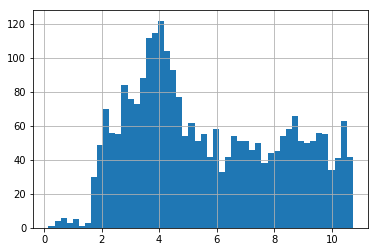


target 1 12.6407394841
30
0.0319275338203643 6.323335812901915 6.3422622109693005


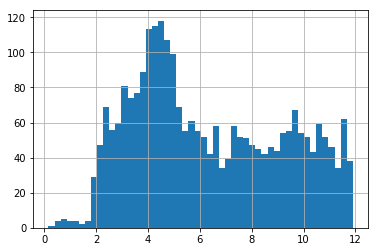


target 2 11.6683749084
30
0.0289392099931354 5.835701041185794 5.8526030259671264


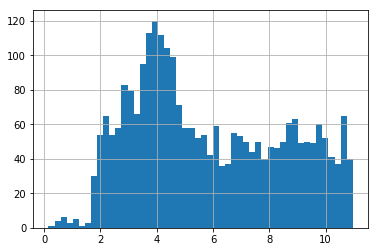


target 3 7.0496431738
30
0.01926224106663521 3.524110810977608 3.5348665378203212


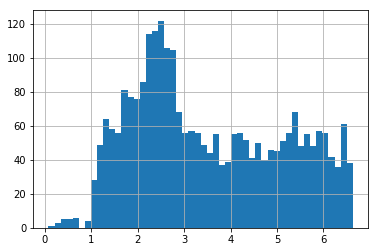


target 4 11.4252837645
30
0.028702409569710357 5.712295663358636 5.7294801217881615


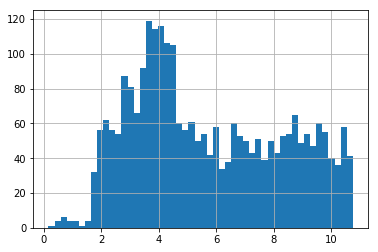


target 5 16.5301977869
30
0.04340668555183341 8.263078111881777 8.287347135950778


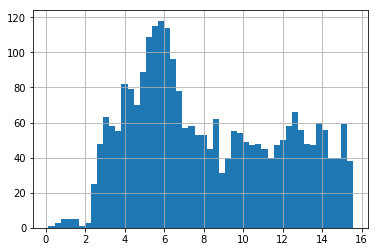


target 6 9.723645757
30
0.0249544499203598 4.862425888008491 4.876199305109741


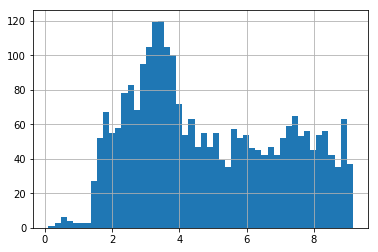


target 7 12.6407394841
30
0.033743145672861935 6.322057534939172 6.34001244359954


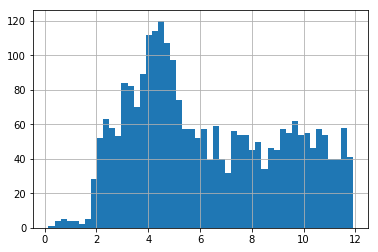


target 8 16.5301977869
30
0.04338332570268831 8.268441503714259 8.291068991304323


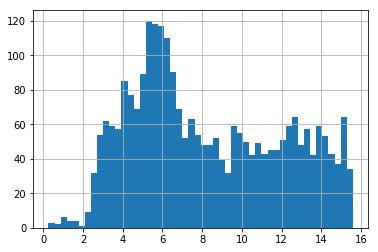

In [48]:
for t in range(len(config.target_lengths)):
    print "\ntarget", t, config.target_lengths[t]
    files= !ls /mnt/lanlep2019/input/sub/{GNO}/{t}/sub{GNO}*
    print len(files)
    b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
    b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
    b[b<0]=0
    print np.abs(b.median(1)-b.mean(1)).mean(),b.mean(1).mean(),b.median(1).mean()
    b.mean(1).hist(bins=50);plt.show();
    
    p=b.mean(1).to_frame().reset_index()
    p.columns=['seg_id','time_to_failure']
    fname =os.path.join(sub_path, "{}_sub{}_at{}.csv".format('mean',GNO,t))
    p.to_csv(fname,index=None)
    
    p=b.median(1).to_frame().reset_index()
    p.columns=['seg_id','time_to_failure']
    fname =os.path.join(sub_path, "{}_sub{}_at{}.csv".format('median',GNO,t))
    p.to_csv(fname,index=None)    

    #break

In [49]:
files= !ls /mnt/lanlep2019/input/sub/{GNO}/mean_sub{GNO}_at?.csv
tidx=[ int(u.split('.')[-2][-1]) for u in files]
tweights=np.array([weights[i] for i in tidx])
tweights=tweights/np.sum(tweights)
print len(files),zip(tidx,tweights)

b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
b=(b*tweights).sum(1)

p=b.to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, os.path.join(sub_path, "weighted_{}_sub{}.csv".format('mean',GNO)))
print p.mean()[0],p.median()[0]
p.to_csv(fname,index=None)

9 [(0, 0.154639175257732), (1, 0.154639175257732), (2, 0.154639175257732), (3, 0.030927835051546396), (4, 0.154639175257732), (5, 0.08247422680412372), (6, 0.030927835051546396), (7, 0.154639175257732), (8, 0.08247422680412372)]
6.247584696578847 5.609268481457333


In [50]:
files= !ls /mnt/lanlep2019/input/sub/{GNO}/median_sub{GNO}_at?.csv
tidx=[ int(u.split('.')[-2][-1]) for u in files]
tweights=np.array([weights[i] for i in tidx])
tweights=tweights/np.sum(tweights)
print len(files),zip(tidx,tweights)

b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
b=(b*tweights).sum(1)

p=b.to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, os.path.join(sub_path, "weighted_{}_sub{}.csv".format('median',GNO)))
print p.mean()[0],p.median()[0]
p.to_csv(fname,index=None)

9 [(0, 0.154639175257732), (1, 0.154639175257732), (2, 0.154639175257732), (3, 0.030927835051546396), (4, 0.154639175257732), (5, 0.08247422680412372), (6, 0.030927835051546396), (7, 0.154639175257732), (8, 0.08247422680412372)]
6.265776315662816 5.63883008449174
